<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/outlier_detection_and_treatment_on_normally_dis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


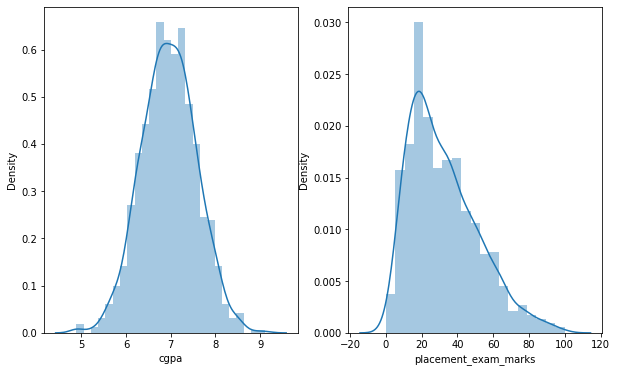

In [16]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()


In [21]:
print('mean value of cgpa',df['cgpa'].mean())
print('std value of cgpa',df['cgpa'].std())
print('min value of cgpa',df['cgpa'].min())
print('max value of cgpa',df['cgpa'].max())

mean value of cgpa 6.96124
std value of cgpa 0.6158978751323896
min value of cgpa 4.89
max value of cgpa 9.12


In [23]:
print('highiest',df['cgpa'].mean() + 3 * df['cgpa'].std())
print('loweat',df['cgpa'].mean() - 3 * df['cgpa'].std())

highiest 8.808933625397168
loweat 5.113546374602832


In [24]:
df[(df['cgpa']> 8.80) ]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [26]:
df[(df['cgpa']< 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [33]:
new_df = df[(df['cgpa'] < 8.80 ) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [38]:
df['zscore']= (df['cgpa']- df['cgpa'].mean())/ df['cgpa'].std()


In [35]:
df.head()

,cgpa,placement_exam_marks,placed,zcsore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [39]:
df[df['zscore'] > 3]

,cgpa,placement_exam_marks,placed,zcsore,zscore
995,8.87,44.0,1,3.099150,3.099150
996,9.12,65.0,1,3.505062,3.505062


In [41]:
df[df['zscore'] < -3]

,cgpa,placement_exam_marks,placed,zcsore,zscore
485,4.92,44.0,1,-3.314251,-3.314251
997,4.89,34.0,0,-3.362960,-3.362960
999,4.90,10.0,1,-3.346724,-3.346724


In [44]:
new_df1=df[(df['zscore'] < 3) & (df['zscore'] > -3)]
new_df1

,cgpa,placement_exam_marks,placed,zcsore,zscore
0,7.19,26.0,1,0.371425,0.371425
1,7.46,38.0,1,0.809810,0.809810
2,7.54,40.0,1,0.939701,0.939701
3,6.42,8.0,1,-0.878782,-0.878782
4,7.23,17.0,0,0.436371,0.436371
...,...,...,...,...,...
991,7.04,57.0,0,0.127878,0.127878
992,6.26,12.0,0,-1.138565,-1.138565
993,6.73,21.0,1,-0.375452,-0.375452
994,6.48,63.0,0,-0.781363,-0.781363


In [45]:
upper_limit=df['cgpa'].mean() + 3 * df['cgpa'].std()
upper_limit

8.808933625397168

In [46]:
lower_limit=df['cgpa'].mean() - 3* df['cgpa'].std()
lower_limit

5.113546374602832

In [47]:
df['cgpa']=np.where(df['cgpa'] > upper_limit, upper_limit,
          np.where(df['cgpa'] < lower_limit, lower_limit,
          df['cgpa']
          )
         )

In [50]:
df.shape

(1000, 5)

In [51]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64